# Proyek Analisis Data : [Bike Sharing Dataset]



*   Nama : Muhammad Daffa Nurahman
*   Email : muhammaddaffanurahman44@student.cs.unida.gontor.ac.id


*   ID Dicoding : daffa_nurahman





# Menentukan Pertanyaan Bisnis

*   Bulan apa yang memiliki tingkat peminjaman sepeda tertinggi dan terendah?
*   Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?
*   Apakah ada pengaruh musim atau cuaca terhadap jumlah peminjaman sepeda?
*   Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?




# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as StandardScaler
import datetime
import calendar

# Data Wrangling

## Gathering Data

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih **Bike Sharing Dataset**, maka saya mengimpor file **day.csv dan hr.csv**

In [2]:
#Memuat tabel harian dan tabel hour

hari_df = pd.read_csv('day.csv')
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Membuat tabel hour

hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

### Table day

In [4]:
#Melihat berbagai masalah dalam tiap tabel data
#tabel day

hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil diatas, terlihat terdapat beberapa kolom yang masih kurang sesuai dengan tipe data yang diinginkan, kolom berikut antara lain:



*   dteday, bertipe data object, akan diubah menjadi datetime
*   season, bertipe data integer, akan diubah menjadi string

*   mnth, bertipe data integer, akan diubah menjadi string
*   weekday, bertipe data integer, akan diubah menjadi string








In [5]:
#Melihat missing value dari tabel day

hari_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#Melihat jumlah duplikat

print("Jumlah Duplikasi : ", hari_df.duplicated().sum())

Jumlah Duplikasi :  0


In [7]:
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Table Hour

In [8]:
#Melihat info tabel hour

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#Melihat missing value

hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
#Melihat jumlah duplikat

print("Jumlah Duplikasi : ", hour_df.duplicated().sum())

Jumlah Duplikasi :  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kesimpulan dari Assessing Data :



*   Tidak terdapat adanya missing value dalam data dan tidak ada data yang duplikat
*   Masih ada beberapa data yang mungkin masih sulit dipahami bagi audiens nantinya





## Cleaning Data

### Menghapus tabel yang tidak diperlukan

In [12]:
del hour_df

Sebelum kita masuk ke tahapan-tahapan selanjutnya, kita sekarang akan menghapus terlebih dahulu tabel **hr**. Alasannya adalah karena kita tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan, dan juga sebenarnya tabel hr dan day itu bedanya hanya di kolom hrnya saja, selebihnya sama semua.

### Menghapus beberapa kolom yang tidak digunakan

In [13]:
drop_col = ['instant', 'windspeed']

for i in hari_df.columns:
  if i in drop_col:
    hari_df.drop(labels=i, axis=1, inplace=True)

hari_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


### Mengubah tipe data 'dteday'

In [14]:
# Mengonversi kolom 'dteday' menjadi format datetime
hari_df['dteday'] = pd.to_datetime(hari_df['dteday'])

# Melihat tipe data untuk memastikan
print(hari_df.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


### Mengubah beberapa detail kolom

In [15]:
# Mengubah nama judul kolom
hari_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

hari_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


### Mengubah tipe data season, weekday, month, yr dan mengubah nilai pada setiap kolom

In [16]:
# Mengubah angka menjadi keterangan
hari_df['month'] = hari_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hari_df['season'] = hari_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hari_df['weekday'] = hari_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hari_df['weather_cond'] = hari_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [17]:
# Mengubaha tipe data ke categorical
hari_df['season'] = hari_df.season.astype('category')
hari_df['year'] = hari_df.year.astype('category')
hari_df['month'] = hari_df.month.astype('category')
hari_df['holiday'] = hari_df.holiday.astype('category')
hari_df['weekday'] = hari_df.weekday.astype('category')
hari_df['workingday'] = hari_df.workingday.astype('category')
hari_df['weather_cond'] = hari_df.weather_cond.astype('category')

hari_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


# Exploratory Data Analysis

## Mengelompokkan penyewa sepeda berdasarkan bulan

In [18]:
hari_df.groupby(by='month').agg({
    'count': ['max', 'min', 'sum']
})

<ipython-input-18-973bee3ccaff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by='month').agg({


count              
        max   min     sum
month                    
Apr    7460   795  269094
Aug    7865  1115  351194
Dec    6606   441  211036
Feb    5062  1005  151352
Jan    4521   431  134933
Jul    8173  3285  344948
Jun    8120  3767  346342
Mar    8362   605  228920
May    8294  2633  331686
Nov    6852  1495  254831
Oct    8156    22  322352
Sep    8714  1842  345991

In [19]:
monthly_agg = hari_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean','sum']
})

# Urutkan berdasarkan 'sum' dari 'count' secara descending (tertinggi ke terendah)
monthly_agg_sort = monthly_agg.sort_values(('count', 'sum'), ascending=False)

# Tampilkan hasil
print(monthly_agg_sort)

      count                           
        max   min         mean     sum
month                                 
Aug    7865  1115  5664.419355  351194
Jun    8120  3767  5772.366667  346342
Sep    8714  1842  5766.516667  345991
Jul    8173  3285  5563.677419  344948
May    8294  2633  5349.774194  331686
Oct    8156    22  5199.225806  322352
Apr    7460   795  4484.900000  269094
Nov    6852  1495  4247.183333  254831
Mar    8362   605  3692.258065  228920
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933


<ipython-input-19-37755e660e38>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_agg = hari_df.groupby(by='month').agg({


Berdasarkan pengelompokkan diatas dan juga data telah diurutkan data dari yang paling tertinggi ke yang terendah, ternyata penyewa sepeda terbanyak terdapa pada **Bulan Agustus** dan yang paling sedikit ada pada **Bulan Januari**

## Mengelompokkan penyewa sepeda berdasarkan tahun

In [20]:
hari_df.groupby(by='year').agg({
    'count': ['max', 'min', 'sum']
})

<ipython-input-20-650db0ff4cc8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by='year').agg({


count              
       max  min      sum
year                    
0     6043  431  1243103
1     8714   22  2049576

## Mengelompokkan penyewa sepeda berdasarkan hari

In [21]:
hari_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'sum']
})

<ipython-input-21-119e7ab1a69c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by='weekday').agg({


count              
          max   min     sum
weekday                    
Fri      8362  1167  487790
Mon      7525    22  455503
Sat      8714   627  477807
Sun      8227   605  444027
Thu      7804   431  485395
Tue      7767   683  469109
Wed      8173   441  473048

In [22]:
hari_sort = hari_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean','sum']
})

sorter = hari_sort.sort_values(('count', 'sum'), ascending=False)

print(sorter)

        count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Thu      7804   431  4667.259615  485395
Sat      8714   627  4550.542857  477807
Wed      8173   441  4548.538462  473048
Tue      7767   683  4510.663462  469109
Mon      7525    22  4338.123810  455503
Sun      8227   605  4228.828571  444027


<ipython-input-22-03955776fd05>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_sort = hari_df.groupby(by='weekday').agg({


Dapat kita lihat setelah data diurutkan, penyewa sepeda terbanyak terdapat pada **Hari Jum'at** dan yang paling sedikit terdapat pada **Hari Minggu**

## Mengelompokkan penyewa sepeda berdasarkan hari libur atau tidak

In [23]:
hari_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'sum']
})

<ipython-input-23-a70938eab71a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by='holiday').agg({


count               
          max   min      sum
holiday                     
0        8714    22  3214244
1        7403  1000    78435

## Mengelompokkan penyewa sepeda berdasarkan cuaca dan musim

In [24]:
hari_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'sum']
})

<ipython-input-24-ff9cdc8848ac>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by='weather_cond').agg({


count              
                      max  min      sum
weather_cond                           
Clear/Partly Cloudy  8714  431  2257952
Light Snow/Rain      4639   22    37869
Misty/Cloudy         8362  605   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang **Cerah dan Berawan**. Sangat sedikit ketika **salju turun** dan tidak ada ketika cuaca sedang **sangat buruk**.

## Mengelompokkan penyewa sepeda berdasarkan (baik casual atau registered) berdasarkan season

In [25]:
hari_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

<ipython-input-25-70c49bdc61ed>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada **musim gugur (Fall)**, dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada **musim semi (Spring)** dengan rata-rata yang paling kecil.

# Explanatory Data Analysis

## Pertanyaan 1 : Bulan apa yang memiliki tingkat peminjaman sepeda tertinggi dan terendah?

<ipython-input-26-be7ef90384a3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


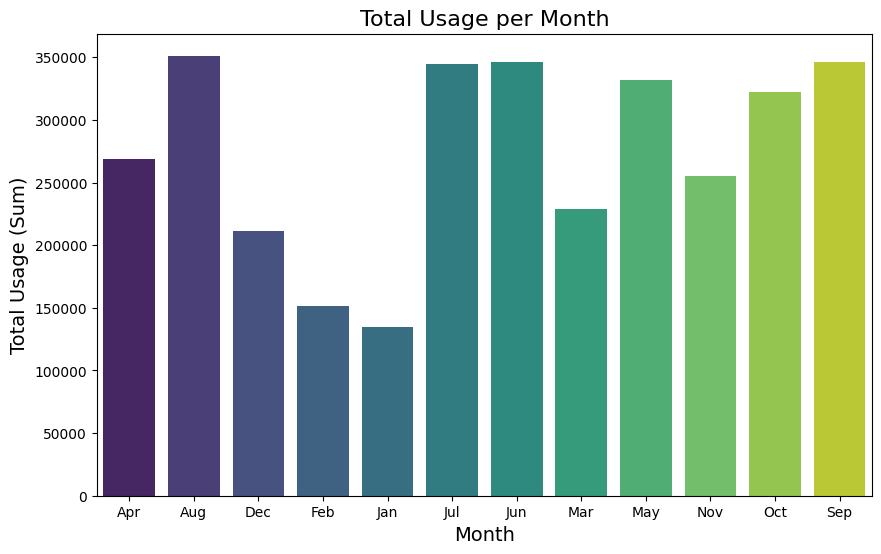

In [26]:
hari_df['month'] = pd.Categorical(hari_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

# Buat bar plot menggunakan Seaborn
plt.figure(figsize=(10, 6))  # Tentukan ukuran figure
sns.barplot(
    x='month',
    y=('count', 'sum'),
    data=monthly_agg_sort,
    palette='viridis'
)

# Menambahkan judul dan label sumbu
plt.title('Total Usage per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Usage (Sum)', fontsize=14)

# Tampilkan visualisasi
plt.show()

Berdasarkan hasil visualisasi data diatas, **Bulan Agustus** menjadi bulan yang paling diminati untuk menyewa sepeda. Dan pada **Bulan Januari** menjadi bulan yang paling sedikit oleh penyewa sepeda.

## Pertanyaan 2 : Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?

<ipython-input-27-0c9c0968da71>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = hari_df.groupby(by=["month","year"]).agg({


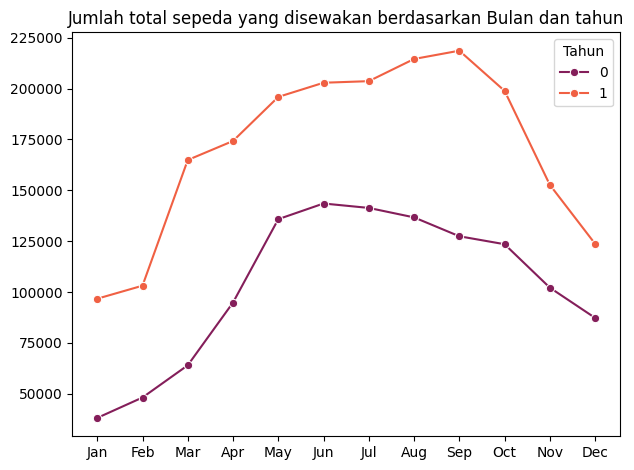

In [27]:
hari_df['month'] = pd.Categorical(hari_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = hari_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa **tahun 2012 (yang diwakili oleh angka 1)** jelas menang unggul baik dari januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada **Bulan September**, sementara bulan yang paling sepi terjadi pada **Bulan Januari**. Sedangkan pada **tahun 2011** puncak penyewaan sepeda terjadi pada **Bulan Juni** dan memiliki penyewaan tersepi pada **Bulan Januari**.

## Pertanyaan 3 : Apakah ada pengaruh musim atau cuaca terhadap jumlah peminjaman sepeda?

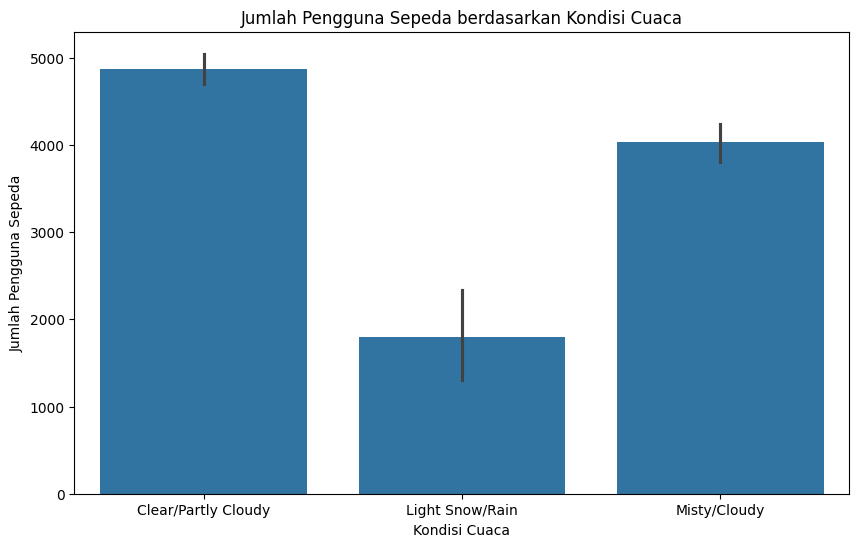

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=hari_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan kedua visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang **cerah/setengah mendung** menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca **berkabut/mendung**, dan terakhir ketika cuaca sedang sedikit **bersalju/hujan** menjadi yang paling sedikit diminati.

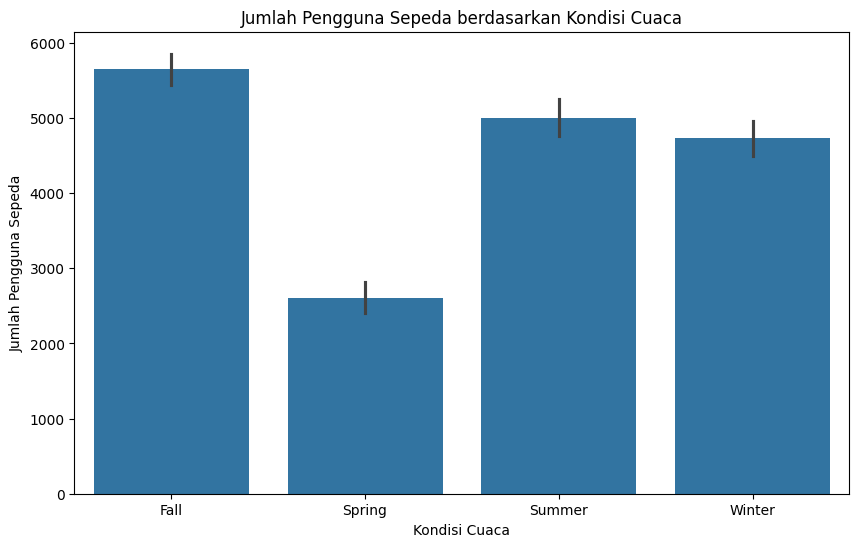

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='count',
    data=hari_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Hasil visualisasi diatas menunjukkan bahwa cuaca berpengaruh terhadap jumlah penyewaan sepeda, dimana pada saat **cuaca cerah**, jumlah penyewaan sepeda lebih banyak dibanding cuaca yang lain, dan paling sedikit disaat **cuaca buruk**.

## Pertanyaan 4 : Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

<ipython-input-30-af8f548c0f5d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = hari_df.groupby('season')[['registered', 'casual']].sum().reset_index()


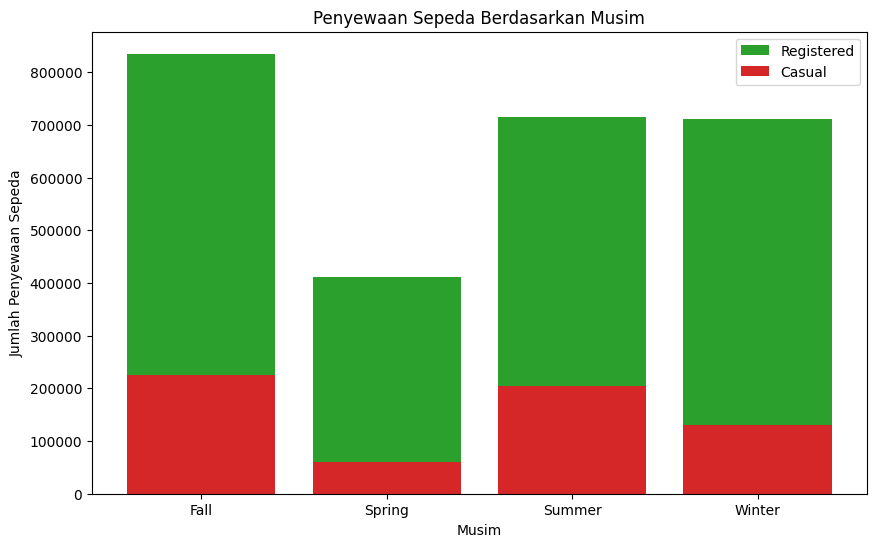

In [30]:
#Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = hari_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat bar chart untuk pengguna terdaftar
plt.bar(
   seasonal_usage['season'],
   seasonal_usage['registered'],
   label='Registered',
   color='tab:green'
)

# Membuat bar chart untuk pengguna casual
plt.bar(
   seasonal_usage['season'],
   seasonal_usage['casual'],
   label='Casual',
   color='tab:red'
)

plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.legend()
plt.show()

Berdasarkan hasil analisis diatas menggunakan barplot, dapat disimpulkan bahwa di semua musim yang paling dinikmati bagi para pengguna sepeda (Casual dan Registered) adalah **Musim Gugur (Fall)**, lalu diikuti dengan **Musim Panas (Summer)**, **Musim Dingin (Winter)**, dan diakhiri dengan **Musim Semi (Spring)**.

# Menyimpan Data yang telah digunakan

In [31]:
hari_df.to_csv("hari_clean.csv", index=False)